# Hypothesis testing problems

## Exercise 1

You are a nutritionist researching two different types of diets to see if there is a significant difference in weight loss after one month. You choose two random groups of people; one group follows the first diet, and the other follows the second. At the end of the month, you record the weight loss (in kg) for each person:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

With these data, it seeks to answer the following question: Is there a significant difference in average weight loss between people who followed the first diet and those who followed the second diet?

To draw conclusions, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the test to test the hypothesis. You can use a Student's t-test.
- Analyze the conclusions.

### HIPOTESIS

- Hipótesis nula (H0): Media de diet1 es igual a la media de diet2. No hay diferencia significativa entre las dos dietas.
- Hipótesis Alternativa (H1): Media de diet1 es menor que la media de diet2 o Media de diet1 es mayor que la media de diet2.

2.542857142857143 3.0285714285714285
t-statistic: -3.5383407969933938
P-value: 0.002041635095856956
There is a significant difference between the two diets


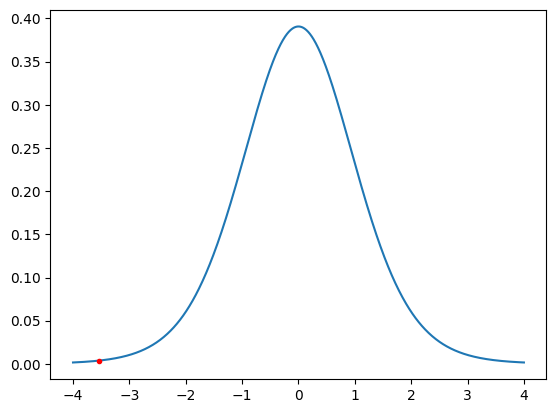

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


diet1 = [2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5]
diet2 = [3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2]
sample_diet1 = np.array(diet1)
sample_diet2 = np.array(diet2)
diet1_mean = sample_diet1.mean()
diet2_mean = sample_diet2.mean()
print(diet1_mean, diet2_mean)

# print(diet1_mean,diet2_mean)
# n1 = len(sample_diet1)
# n2 = len(sample_diet2)
# z1_score = (diet1_mean - poblational_proportion) / np.sqrt((poblational_proportion * (1 - poblational_proportion)) / n1)
# z2_score = (diet2_mean - poblational_proportion) / np.sqrt((poblational_proportion * (1 - poblational_proportion)) / n2)
# p1_value = 2 * (1 - stats.norm.cdf(abs(z1_score)))
# p2_value = 2 * (1 - stats.norm.cdf(abs(z2_score)))

# Compruebo si la media de diet1 es menor que diet2
t_statistic, p_value = stats.ttest_ind(diet1, diet2, alternative = 'less')

# Se comprueba que la media de diet1 es menor que diet2. El valor negativo de la t-statistic sigue indicando que es cierto
print(f"t-statistic: {t_statistic}")
#
print(f"P-value: {p_value}")
# el nivel de significación (alfa: grado de error que admitimos para aceptar o rechazar la hipótesis)
if (p_value < 0.05):
    print("There is a significant difference between the two diets")
else:
    print("There is no significant difference between the two diets")

# print(f"Z1-score value: {z1_score}")
# print(f"P1-value: {p1_value}")

# print(f"Z2-score value: {z2_score}")
# print(f"P2-value: {p2_value}")


#Graficar plot
df = len(diet1) + len(diet2) - 2  # Grados de libertad/ degree of freedom
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

x_stat = t_statistic
y_stat = stats.t.pdf(x_stat, df)
plt.plot(x,y)
plt.plot(x_stat,y_stat, '.r')
plt.show()

Conclusión: t-statistic al ser negativo nos indica que la media de diet1 es menor que la media de diet2 .Este valor (t-statistic) solo nos da información sobre la dirección de la diferencia, y el valor p es el que nos dice si esa diferencia es significativa o no. p_value es mucho menor que el nivel de significancia (alfa) de 0.05, esto significa que podemos rechazar la hipótesis nula y concluir que la media de diet1 es mucho menor que la media de diet2

## ANOVA

**ANOVA** (*Analysis of Variance*) is a statistical technique used to compare the measures of two or more groups. The idea behind ANOVA is to decompose the total variability in the data into two components: between-group variability and within-group variability:

- **Between-group variability**: This variability refers to the differences between the group means. If this variability is considerably larger than the within-group variability, it could be an indication that at least one of the group means is different.
- **Within-group variability**: This variability refers to the dispersion of the data within each group. If all groups have similar variability, then any noticeable difference in group means could be considered significant.

Hypotheses in ANOVA typically include:

- **Null hypothesis** ($H₀$): The means of all groups are equal.
- **Alternative hypothesis** ($H₁$): At least one of the group means is different.

If the ANOVA test result is significant (e.g., a p-value less than a threshold such as 0.05), this suggests that at least one group mean is different.

## Exercise 2

A farmer decides to test three different types of fertilizers to determine if one is superior in terms of corn production. The farmer plants corn on 15 identical plots and uses all three fertilizers (5 plots for each type). At the end of the season, he measures the corn yield (in kg) of each plot, with the following result:

| Fertilizer 1 | Fertilizer 2 | Fertilizer 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

With this data, he seeks to answer the following question: Is there a significant difference in average corn yield between the three types of fertilizers?

To help you, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the ANOVA test.
- Analyze the conclusions.
- If one fertilizer is better than another, how can we know it?

### HIPOTESIS

- Hipótesis nula: Todos son iguales funcionan
- Hipótesis alternativa: Fertilizer3 es superior. Hay diferencia entre al menos uno de los grupos

20.315789473684188
0.00014047824793190472
There is a significant difference between one of the three fertilizer
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    F1     F2      1.8 0.0099 0.4572 3.1428   True
    F1     F3      3.2 0.0001 1.8572 4.5428   True
    F2     F3      1.4 0.0409 0.0572 2.7428   True
--------------------------------------------------


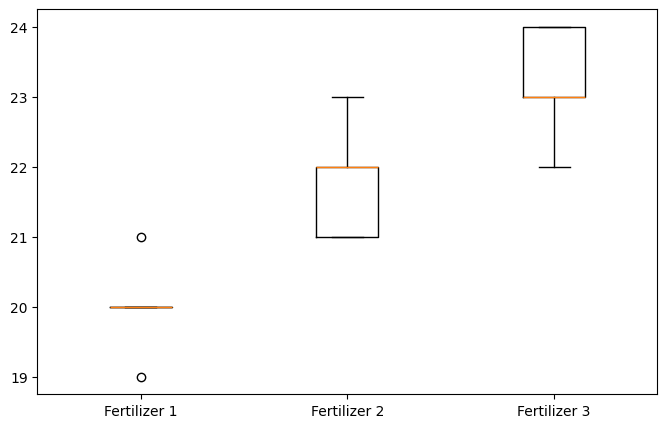

In [5]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
alfa = 0.05
fertilizer1 = [20, 21, 20, 19, 20]
fertilizer2 = [22, 21, 23, 22, 21]
fertilizer3 = [24, 23, 22, 23, 24]
F = stats.f_oneway(fertilizer1, fertilizer2, fertilizer3)
print(F.statistic)
print(F.pvalue)
if (F.pvalue < 0.05):
    print("There is a significant difference between one of the three fertilizer")
else:
    print("There is no significant difference between the three fertilizer")

data = np.concatenate([fertilizer1, fertilizer2, fertilizer3])
group = ['F1'] * 5 + ['F2'] * 5 + ['F3'] * 5
print(pairwise_tukeyhsd(data, group, alfa))
## Graficar boxplot

plt.figure(figsize=(8,5))
plt.boxplot([fertilizer1, fertilizer2, fertilizer3], tick_labels = ['Fertilizer 1', 'Fertilizer 2', 'Fertilizer 3'])
plt.show()

Un valor alto de F.statistic nos indica que hay una gran diferencia entre las medias de los grupos en comparación el resto, lo que puede significar que al menos un grupo es significativamente diferente. Un valor de F.pvalue bajo nos indica que podemos rechazar la hipótesis nula, y por tanto, hay al menos un grupo que es significativamente diferente. El ANOVA solo te dice que hay una diferencia entre los grupos, pero no te dice qué grupo es diferente.